In [109]:
import numpy as np
import argparse
import cv2
import time


img = cv2.imread('Cataract 1.jpeg', 0)
cv2.imshow('image', img)

#img=cv2.resize(img, (256, 256))

cv2.waitKey(0)

# When everything done, release the capture

cv2.destroyAllWindows()
output = img.copy()
result = img.copy()
gray = img


# apply GuassianBlur to reduce noise. medianBlur is also added for smoothening, reducing noise.
gray = cv2.GaussianBlur(gray,(5,5),0);
gray = cv2.medianBlur(gray,5)

# Adaptive Guassian Threshold is to detect sharp edges in the Image. For more information Google it.
gray = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
        cv2.THRESH_BINARY,11,3.5)

kernel = np.ones((2,2),np.uint8)
gray = cv2.erode(gray,kernel,iterations = 1)
# gray = erosion

gray = cv2.dilate(gray,kernel,iterations = 1)
# gray = dilation

# get the size of the final image
# img_size = gray.shape
# print img_size

# detect circles in the image
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 200, param1=30, param2=45, minRadius=0, maxRadius=0)
# print circles

# ensure at least some circles were found
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")

    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
        # draw the circle in the output image, then draw a rectangle in the image
        # corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (255, 255,255), 2)
        #cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
        #time.sleep(0.5)
        print ("Column Number: ")
        print (x)
        print ("Row Number: ")
        print (y)
        print ("Radius is: ")
        print (r)
        

# Display the resulting frame
    cv2.imshow('gray',gray)
    cv2.imshow('output',output)
    

image=result[y-r:y+r, x-r:x+r]
cv2.imshow('Cropped Image', image)
       
resized=cv2.resize(image, (256,256))
cv2.imshow('Resized Image', resized)    

cv2.waitKey(0)

# When everything done, release the capture

cv2.destroyAllWindows()

Column Number: 
266
Row Number: 
152
Radius is: 
91


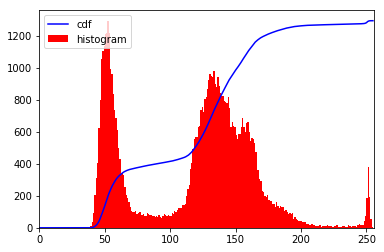

In [110]:
#Histogram 

from matplotlib import pyplot as plt
img = resized
img2=resized
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum() 
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b') 
plt.hist(img.flatten(),256,[0,256], color = 'r') 
plt.xlim([0,256]) 
plt.legend(('cdf','histogram'), loc = 'upper left') 
plt.show()


In [105]:
hist

array([    0,     0,     7,     9,    12,    27,    41,   111,   284,
         498,  1093,  3332, 36908,  4832,  2425,  1539,  1153,   812,
         543,   449,   374,   339,   263,   231,   216,   196,   168,
         151,   128,   148,   125,   145,   140,   127,   144,   163,
         133,   124,   144,   139,   148,   141,   146,   134,   141,
         131,   163,   203,   158,   173,   134,   172,   163,   177,
         175,   184,   195,   181,   172,   189,   147,   153,   157,
         163,   140,   119,   164,   146,   131,   146,   151,   161,
         131,   133,   106,   141,   125,   119,   103,   106,   105,
          84,   108,    92,    91,   108,    94,    96,    90,    86,
          83,    63,    79,    63,    47,    59,    61,    51,    37,
          36,    31,    28,    37,    24,    24,    14,    19,    22,
           8,    11,    10,    13,     6,    12,     8,     6,     6,
           9,     5,     8,     3,     1,     2,     1,     0,     0,
           0,     0,

In [131]:
uniformity=((hist/(256*256))**2).sum()
uniformity


0.010606417432427406

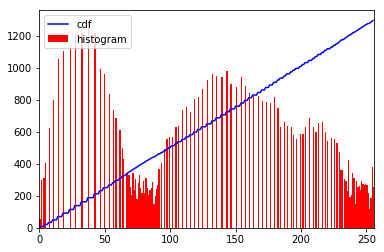

In [111]:
#Equalizition 
equ = cv2.equalizeHist(img2) 
res = np.hstack((img2,equ))
img1=img2
img2=equ
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum() 
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b') 
plt.hist(img2.flatten(),256,[0,256], color = 'r') 
plt.xlim([0,256]) 
plt.legend(('cdf','histogram'), loc = 'upper left') 
plt.show()
cv2.imshow('result',equ)
cv2.imshow('Original',img1)

resultant_image=equ
cv2.waitKey(0) 

cv2.destroyAllWindows()

In [50]:
resultant_image=resized

In [132]:
intensity=resultant_image.flatten().sum()/(256*256)

In [133]:
intensity

128.85519409179688

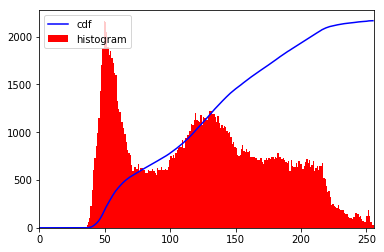

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
img = cv2.imread('Cataract 1.jpeg',0)
xd=img.copy()
hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
 
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


In [ ]:
import numpy as np
import cv2

# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

cv2.imwrite('clahe_2.jpg',cl1)

In [ ]:
if len(circles) == 1:
    x, y, r = circles[0]
    print (x, y, r)
    mask = np.zeros((img.shape[0],img.shape[1]),dtype=np.uint8)
    cv2.circle(mask,(x,y),r,(255,255,255),-1,8,0)
    #cv2.imwrite(argv[2],mask)
    out = img*mask
    white = 255-mask
    cv2.imwrite('new.jpg',255-out+white)
    new=cv2.imread('new.jpg', 0)
    cv2.imshow('new',new)
    

In [ ]:
if len(circles) == 1:
    x, y, r = circles[0]
    print (x, y, r)
    mask = np.zeros((img.shape[0],img.shape[1]),dtype=np.uint8)
    cv2.circle(mask,(x,y),r,(255,255,255),-1,8,0)
    #cv2.imwrite(argv[2],mask)
    out = img*mask
    white = 255-mask
    cv2.imwrite('new.jpg',255-out+white)
    
new=cv2.imread('new.jpg', 0)
cv2.imshow('gray',gray)
cv2.imshow('frame',output)
cv2.imshow('new',new)
    
      
    
    
cv2.waitKey(0)   

cv2.destroyAllWindows()

In [ ]:

# ensure at least some circles were found
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")

    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
        # draw the circle in the output image, then draw a rectangle in the image
        # corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
        #time.sleep(0.5)
        print ("Column Number: ")
        print (x)
        print ("Row Number: ")
        print (y)
        print ("Radius is: ")
        print (r)

# Display the resulting frame
    cv2.imshow('gray',gray)
    cv2.imshow('frame',output)
    
    
    
cv2.waitKey(0)

# When everything done, release the capture

cv2.destroyAllWindows()

In [ ]:

# ensure at least some circles were found
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")

    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
        # draw the circle in the output image, then draw a rectangle in the image
        # corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
        #time.sleep(0.5)
        print ("Column Number: ")
        print (x)
        print ("Row Number: ")
        print (y)
        print ("Radius is: ")
        print (r)

# Display the resulting frame
    cv2.imshow('gray',gray)
    cv2.imshow('frame',output)
    
    
    
cv2.waitKey(0)

# When everything done, release the capture

cv2.destroyAllWindows()

In [ ]:
  
if val is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    val = np.round(circles[0, :]).astype("int")
    
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in val:
        # draw the circle in the output image, then draw a rectangle in the image
        # corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
        #time.sleep(0.5)
        

# Display the resulting frame
    cv2.imshow('gray',gray)
    cv2.imshow('frame',output)

cv2.waitKey(0)
# When everything done, release the capture

cv2.destroyAllWindows()
